# NN

## Prepare execution

### Imports

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import AUC
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

2025-07-01 18:03:37.497752: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751385817.512119   23536 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751385817.516731   23536 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751385817.527932   23536 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751385817.527948   23536 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751385817.527949   23536 computation_placer.cc:177] computation placer alr

### Load both datasets

In [2]:
train_df = pd.read_csv('../data/loan_data_prepared_train.csv')
test_df = pd.read_csv('../data/loan_data_prepared_test.csv')

### Goal Column

In [3]:
target_col = 'loan_status'

### Split X and Y

In [4]:
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

## Train Model

### Create NN model

In [11]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

/home/ced/src/ml-models-comparison/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile model

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc')])

### Fit model

In [13]:
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.8047 - auc: 0.8172 - loss: 0.3962
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 899us/step - accuracy: 0.8941 - auc: 0.9481 - loss: 0.2369
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.9040 - auc: 0.9563 - loss: 0.2160
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 860us/step - accuracy: 0.9092 - auc: 0.9602 - loss: 0.2041
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.9120 - auc: 0.9619 - loss: 0.1993
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - accuracy: 0.9141 - auc: 0.9627 - loss: 0.1964
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step - accuracy: 0.9117 - auc: 0.9629 - loss: 0.1969
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.9158 - auc: 0.9649 - loss: 0.1895
Epoch 9/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.9153 - auc: 0.9640 - loss: 0.1925
Epoch 10/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accur

## Test

### Predict output

In [14]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int).flatten()

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step


### Evaluate model on test data

In [15]:
print("Accuracy:", round(accuracy_score(y_test, y_pred_binary), 3))

Accuracy: 0.923


### Display Confusion Matrix

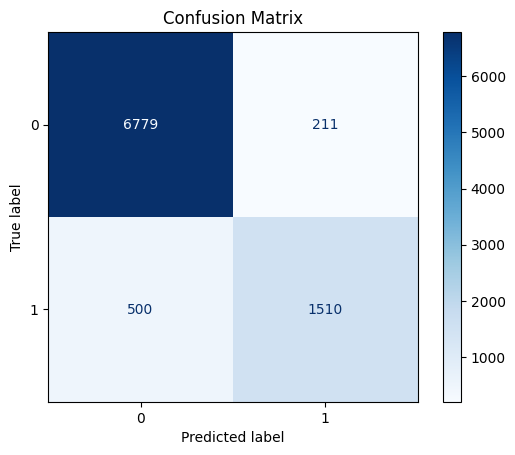

In [10]:
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()